1515.7961962890624


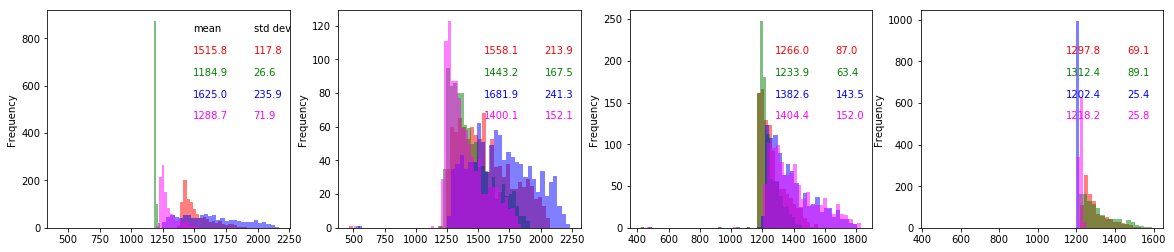

In [15]:
%matplotlib inline
import math
import pandas as pd
import matplotlib.pyplot as plt

colors = ['red', 'green', 'blue', 'magenta']

file = '/home/ebusato/Travail/gowork2/src/gitlab.in2p3.fr/avirm/analysis-go/dpgatca/analysis/pedestal/output.csv'

df = pd.read_csv(file)

me = df["ChanWithData240_160"].mean()
print(me)

Quartets = []

for i in range(60):
    Pulses = []
    for j in range(4):
        s = 'ChanWithData240_'
        idx = i*4+j
        s += str(idx)
        #print(s)
        Pulses.append(df[s])
    Quartets.append(Pulses)


def plotQuartet(quartet, ax):
    for i in range(4):
        quartet[i].plot.hist(alpha=0.5, bins=50, color=colors[i])
#         plt.text(0.6, 0.8-0.1*i, str(quartet[i].mean()), transform=ax.transAxes, color=colors[i])
        plt.text(0.6, 0.8-0.1*i, format(quartet[i].mean(), '.1f'), transform=ax.transAxes, color=colors[i])
        plt.text(0.85, 0.8-0.1*i, format(math.sqrt(quartet[i].var()), '.1f'), transform=ax.transAxes, color=colors[i])
        
import matplotlib as mpl

plt.figure(1, figsize=(20,4))
ax = plt.subplot(141)
plt.text(0.6, 0.9, "mean", transform=ax.transAxes)
plt.text(0.85, 0.9, "std dev", transform=ax.transAxes)
plotQuartet(Quartets[40], ax)
ax = plt.subplot(142)
plotQuartet(Quartets[41], ax)
ax = plt.subplot(143)
plotQuartet(Quartets[42], ax)
ax = plt.subplot(144)
plotQuartet(Quartets[43], ax)
# plt.subplot(145)
# df[["ChanWithData240_160","ChanWithData240_161"]].boxplot(vert=False)
# plt.tight_layout()

plt.show()